<a href="https://colab.research.google.com/github/Rifana20/ImageClassificationUsingCNN/blob/main/ImageClassificationUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test=y_test.reshape(-1,)

In [9]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

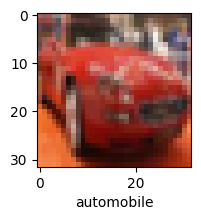

In [14]:
plot_sample(X_train,y_train,5)

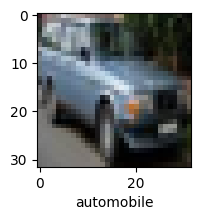

In [16]:
plot_sample(X_train,y_train,201)

In [17]:
X_train=X_train/255.0
X_test=X_test/255.0

In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.3105 - loss: 1.9294
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 271s 147ms/step - accuracy: 0.4219 - loss: 1.6392
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 224s 123ms/step - accuracy: 0.4551 - loss: 1.5446
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 233s 143ms/step - accuracy: 0.4749 - loss: 1.4885
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 109ms/step - accuracy: 0.4950 - loss: 1.4322


In [21]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n',classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.63      0.45      0.52      1000
           1       0.59      0.63      0.61      1000
           2       0.39      0.32      0.35      1000
           3       0.35      0.38      0.36      1000
           4       0.35      0.55      0.43      1000
           5       0.46      0.31      0.37      1000
           6       0.61      0.42      0.50      1000
           7       0.64      0.43      0.52      1000
           8       0.52      0.72      0.60      1000
           9       0.48      0.62      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [22]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

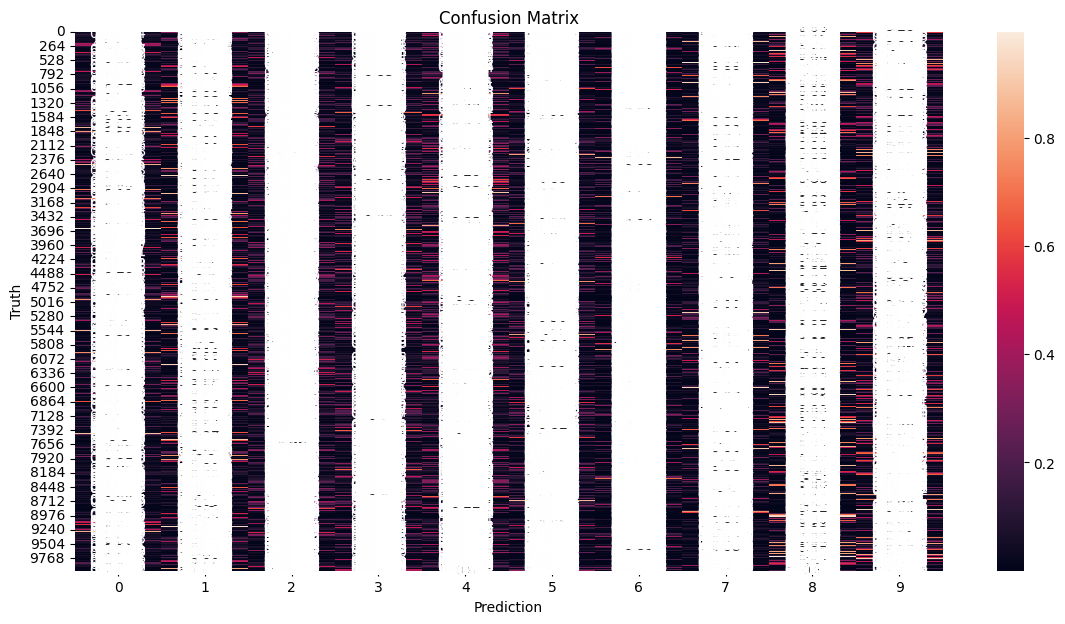

In [24]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred,annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show

In [26]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


In [27]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [28]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3846 - loss: 1.6864
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6038 - loss: 1.1281
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6590 - loss: 0.9838
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6988 - loss: 0.8710
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7209 - loss: 0.7958
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7452 - loss: 0.7310
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7642 - loss: 0.6823
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7819 - loss: 0.6342
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7918 - loss: 0.5914
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.8070 - loss: 0.5527


In [29]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6929 - loss: 0.9352


[0.943427562713623, 0.6949999928474426]

In [30]:
y_prediction=cnn.predict(X_test)
y_prediction[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[1.67288389e-02, 2.26725624e-05, 1.39286192e-02, 8.27645779e-01,
        1.21876095e-04, 2.28221621e-02, 1.04980439e-01, 2.95471284e-04,
        1.30451238e-02, 4.08918044e-04],
       [2.71675130e-03, 1.49265444e-03, 3.35310397e-05, 2.72872768e-07,
        6.03965072e-11, 2.53601318e-09, 9.17574350e-10, 1.20461197e-08,
        9.95714366e-01, 4.23556448e-05],
       [1.34236991e-01, 5.30694649e-02, 6.50565838e-03, 9.60634463e-03,
        1.72268657e-03, 3.42791725e-04, 4.82797841e-05, 9.60486103e-03,
        6.47476673e-01, 1.37386158e-01],
       [9.92565334e-01, 1.73972023e-03, 1.98364118e-03, 8.75608355e-04,
        1.78671631e-04, 2.13331077e-06, 5.70848215e-07, 4.65630765e-05,
        2.46837037e-03, 1.39435870e-04],
       [6.34787853e-07, 1.27574322e-06, 3.22235711e-02, 4.67895754e-02,
        1.16685189e-01, 2.54763640e-04, 8.03918660e-01, 5.00765907e-07,
        1.22210229e-04, 3.51534231e-06]], dtype=float32)

In [31]:
y_classes=[np.argmax(element) for element in y_prediction]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

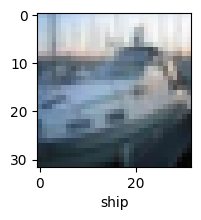

In [38]:
plot_sample(X_test,y_test,2)

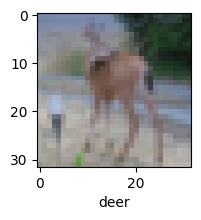

In [34]:
plot_sample(X_test,y_test,100)

In [39]:
classes[y_classes[2]]

'ship'